In [ ]:
# Visualizing Data
# Play with each program by changing data values. 

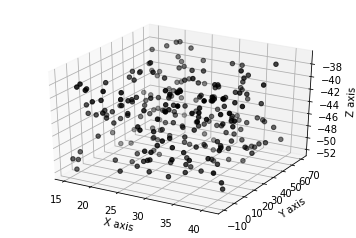

In [9]:
# Plotting 3D scatter plots

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the number of values
n = 250

# Create a lambda function to generate the random values in the given range
f = lambda minval, maxval, n: minval + (maxval - minval) * np.random.rand(n)

# Generate the values
x_vals = f(15, 41, n)
y_vals = f(-10, 70, n)
z_vals = f(-52, -37, n)

# Plot the values
ax.scatter(x_vals, y_vals, z_vals, c='k', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

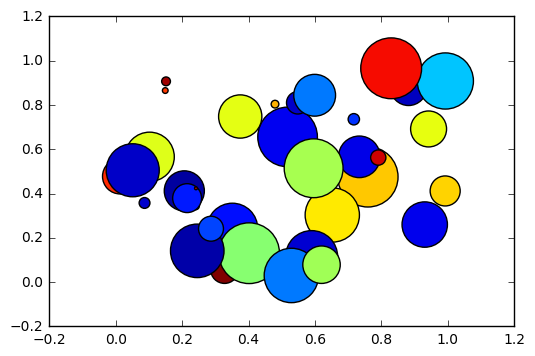

In [3]:
# Plotting bubble plots

import numpy as np
import matplotlib.pyplot as plt

# Define the number of values
num_vals = 40

# Generate random values
x = np.random.rand(num_vals)
y = np.random.rand(num_vals)

# Define area for each bubble
# Max radius is set to a specified value
max_radius = 25
area = np.pi * (max_radius * np.random.rand(num_vals)) ** 2  

# Generate colors
colors = np.random.rand(num_vals)

# Plot the points
plt.scatter(x, y, s=area, c=colors, alpha=1.0)

plt.show()

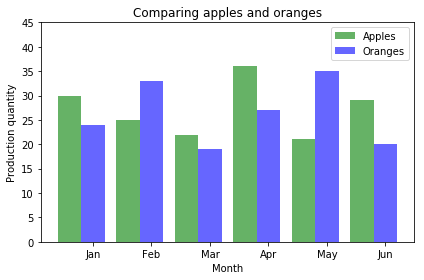

In [13]:
# Plotting histograms

import numpy as np
import matplotlib.pyplot as plt

# Input data
apples = [30, 25, 22, 36, 21, 29]
oranges = [24, 33, 19, 27, 35, 20]

# Number of groups
num_groups = len(apples)

# Create the figure
fig, ax = plt.subplots()

# Define the X axis
indices = np.arange(num_groups)

# Width and opacity of histogram bars
bar_width = 0.4
opacity = 0.6

# Plot the values
hist_apples = plt.bar(indices, apples, bar_width, 
        alpha=opacity, color='g', label='Apples')

hist_oranges = plt.bar(indices + bar_width, oranges, bar_width,
        alpha=opacity, color='b', label='Oranges')

plt.xlabel('Month')
plt.ylabel('Production quantity')
plt.title('Comparing apples and oranges')
plt.xticks(indices + bar_width, ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'))
plt.ylim([0, 45])
plt.legend()
plt.tight_layout()

plt.show()

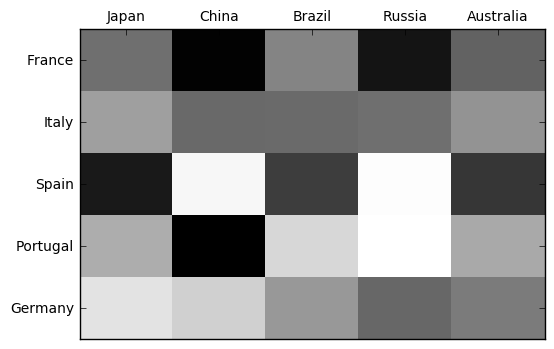

In [8]:
# Visualizing heat maps

import numpy as np
import matplotlib.pyplot as plt

# Define the two groups 
group1 = ['France', 'Italy', 'Spain', 'Portugal', 'Germany'] 
group2 = ['Japan', 'China', 'Brazil', 'Russia', 'Australia']

# Generate some random values
data = np.random.rand(5, 5)

# Create a figure
fig, ax = plt.subplots()

# Create the heat map
heatmap = ax.pcolor(data, cmap=plt.cm.gray)

# Add major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)

# Make it look like a table 
ax.invert_yaxis()
ax.xaxis.tick_top()

# Add tick labels
ax.set_xticklabels(group2, minor=False)
ax.set_yticklabels(group1, minor=False)

plt.show()

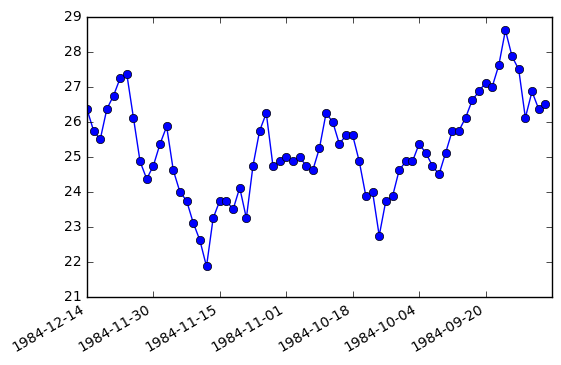

In [7]:
# Plotting date-formatted time-series data

import numpy
import matplotlib.pyplot as plt
from matplotlib.mlab import csv2rec
import matplotlib.cbook as cbook
from matplotlib.ticker import Formatter

# Define a class for formatting
class DataFormatter(Formatter):
    def __init__(self, dates, date_format='%Y-%m-%d'):
        self.dates = dates
        self.date_format = date_format

    # Extact the value at time t at position 'position'
    def __call__(self, t, position=0):
        index = int(round(t))
        if index >= len(self.dates) or index < 0:
            return ''

        return self.dates[index].strftime(self.date_format)

if __name__=='__main__':
    # CSV file containing the stock quotes 
    input_file = cbook.get_sample_data('aapl.csv', asfileobj=False)

    # Load csv file into numpy record array
    data = csv2rec(input_file)
    
    # Take a subset for plotting
    data = data[-70:]

    # Create the date formatter object
    formatter = DataFormatter(data.date)

    # X axis
    x_vals = numpy.arange(len(data))

    # Y axis values are the closing stock quotes
    y_vals = data.close 

    # Plot data
    fig, ax = plt.subplots()
    ax.xaxis.set_major_formatter(formatter)
    ax.plot(x_vals, y_vals, 'o-')
    fig.autofmt_xdate()
    plt.show()

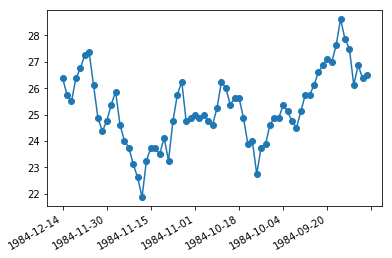

In [3]:
import numpy
import matplotlib.pyplot as plt
from matplotlib.mlab import csv2rec
import matplotlib.cbook as cbook
from matplotlib.ticker import Formatter

# Define a class for formatting
class DataFormatter(Formatter):
    def __init__(self, dates, date_format='%Y-%m-%d'):
        self.dates = dates
        self.date_format = date_format

    # Extact the value at time t at position 'position'
    def __call__(self, t, position=0):
        index = int(round(t))
        if index >= len(self.dates) or index < 0:
            return ''

        return self.dates[index].strftime(self.date_format)

if __name__=='__main__':
    # CSV file containing the stock quotes 
    input_file = cbook.get_sample_data('aapl.csv', asfileobj=False)

    # Load csv file into numpy record array
    data = csv2rec(input_file)
    
    # Take a subset for plotting
    data = data[-70:]

    # Create the date formatter object
    formatter = DataFormatter(data.date)

    # X axis
    x_vals = numpy.arange(len(data))

    # Y axis values are the closing stock quotes
    y_vals = data.close 

    # Plot data
    fig, ax = plt.subplots()
    ax.xaxis.set_major_formatter(formatter)
    ax.plot(x_vals, y_vals, 'o-')
    fig.autofmt_xdate()
    plt.show()

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

f = open('./seoulmetro.csv', 'r')
csvReader = csv.reader(f)

# Create a lambda function to generate the random values in the given range
# f = lambda minval, maxval, n: minval + (maxval - minval) * np.random.rand(n)

# Generate the values
x_vals = [] #date
y_vals = [] #time
z_vals = [] #nunber

for row in csvReader:
    if(row[0].find('한양대') != -1):
        if (row[2].find('하차') != -1):
            for i in range(21): 
                x_vals.append(i)
                y_vals.append((i + 5))
                z_vals.append(row[i + 3].replace(",",""))

# print(str(x_vals) + "  " + str(y_vals) + "   " + str(z_vals))
print(z_vals)
# Plot the values
# ax.scatter(x_vals, y_vals, z_vals, c='k', marker='o')
# ax.set_xlabel('Date')
# ax.set_ylabel('Time')
ax.set_zlabel('Number')

# plt.show()
# print (type(row[0])
f.close
# def separator(a):
       


['13 ', '296 ', '859 ', '3888 ', '3977 ', '2788 ', '1296 ', '1985 ', '1560 ', '1276 ', '886 ', '797 ', '954 ', '1584 ', '822 ', '362 ', '256 ', '224 ', '137 ', '58 ', '2 ', '13 ', '261 ', '875 ', '4029 ', '3023 ', '3327 ', '1424 ', '2056 ', '1683 ', '1273 ', '1069 ', '762 ', '967 ', '1290 ', '843 ', '317 ', '261 ', '232 ', '134 ', '65 ', '3 ', '17 ', '292 ', '901 ', '3650 ', '3314 ', '3043 ', '1346 ', '1975 ', '1303 ', '1246 ', '834 ', '785 ', '935 ', '1418 ', '740 ', '335 ', '278 ', '240 ', '170 ', '63 ', '2 ', '21 ', '279 ', '809 ', '3397 ', '2514 ', '2261 ', '765 ', '1212 ', '1167 ', '872 ', '660 ', '543 ', '530 ', '770 ', '498 ', '278 ', '256 ', '256 ', '209 ', '113 ', '6 ', '16 ', '169 ', '210 ', '881 ', '1335 ', '1056 ', '659 ', '745 ', '939 ', '788 ', '745 ', '569 ', '694 ', '445 ', '403 ', '239 ', '218 ', '251 ', '207 ', '20 ', '0 ', '5 ', '82 ', '77 ', '104 ', '184 ', '182 ', '232 ', '288 ', '487 ', '335 ', '345 ', '279 ', '312 ', '316 ', '248 ', '205 ', '214 ', '226 ', '138 '

<function TextIOWrapper.close>

In [75]:
# Plotting histograms
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

f = open('./20150505MetroInfo1.csv', 'r')
csvReader = csv.reader(f)
station = []
total = []
for row in csvReader:
    if(row[4].find('하차') != -1):
        station.append(row[3])
        total.append(int(row[29]))
        
i = 0;
max_index = 0;
max_ = total[0];
for i in range(len(total)):
    if (max_ < total[i]):
        max_ = total[i]
        max_index = i
        
num_groups = len(station)
# Create the figure
fig, ax = plt.subplots()

# Define the X axis
indices = np.arange(num_groups)

# Width and opacity of histogram bars
bar_width = 0.4
opacity = 0.6
# Plot the values
hist_peoples = plt.bar(indices + bar_width, total, bar_width,
        alpha=opacity, color='b', label='people')

plt.xlabel('Station')
plt.ylabel('Number of People')
plt.title('Comparing')
plt.xticks(indices + bar_width, station)
plt.ylim([0, 100000])
plt.legend()
mngr = plt.get_current_fig_manager()
mngr.window.setGeometry(50,50,960, 640)
plt.tight_layout()
plt.show()
        
print (station[max_index])

AttributeError: 'FigureManagerBase' object has no attribute 'window'

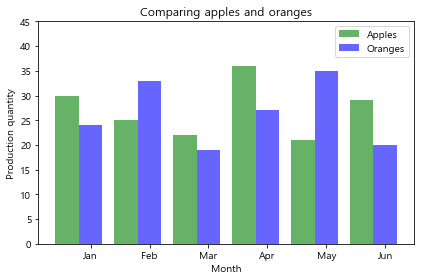

In [135]:
# Plotting histograms

import numpy as np
import matplotlib.pyplot as plt

# Input data
apples = [30, 25, 22, 36, 21, 29]
oranges = [24, 33, 19, 27, 35, 20]

# Number of groups
num_groups = len(apples)

# Create the figure
fig, ax = plt.subplots()

# Define the X axis
indices = np.arange(num_groups)

# Width and opacity of histogram bars
bar_width = 0.4
opacity = 0.6

# Plot the values
hist_apples = plt.bar(indices, apples, bar_width, 
        alpha=opacity, color='g', label='Apples')

hist_oranges = plt.bar(indices + bar_width, oranges, bar_width,
        alpha=opacity, color='b', label='Oranges')

plt.xlabel('Month')
plt.ylabel('Production quantity')
plt.title('Comparing apples and oranges')
plt.xticks(indices + bar_width, ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'))
plt.ylim([0, 45])
plt.legend()
plt.tight_layout()

plt.show()

홍대입구


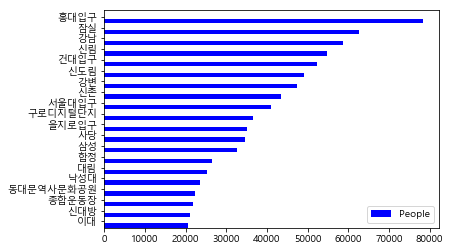

In [151]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)



f = open('./20150505MetroInfo.csv', 'r')
csvReader = csv.reader(f)
station = []
total = []
for row in csvReader:
    if(row[4].find('하차') != -1):
        station.append(row[3])
        total.append(int(row[29]))
        
i = 0;
max_index = 0;
max_ = total[0];
for i in range(len(total)):
    if (max_ < total[i]):
        max_ = total[i]
        max_index = i
        
print(station[max_index])


i = 0
while(i != (len(total) - 1)):
    if (total[i] > total[i + 1]):
        tmp = total[i]
        total[i] = total[i + 1]
        total[i + 1] = tmp
        tmp = station[i]
        station[i] = station[i + 1]
        station[i + 1] = tmp
        i -= 2
        if(i == -2):
            i = -1
    i += 1
station = station[30:]
total = total[30:]
df = pandas.DataFrame(dict(graph = station,
                           people = total)) 

ind = np.arange(len(df))
width = 0.4
fig, ax = plt.subplots()
fig = plt.figure(figsize=(20,20))
ax.barh(ind, df.people, width, align='center', color='blue', label='People')
ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])
ax.legend()

f.close
plt.show()

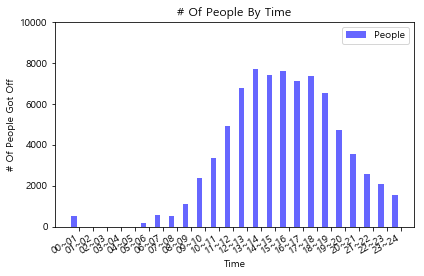

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)



f = open('./20150505MetroInfo.csv', 'r')
csvReader = csv.reader(f)
people = []
for row in csvReader:
    if(row[3].find('홍대입구') != -1):
        if(row[4].find('하차') != -1):
            row = row[5:29]
            people = row
            
timeset = ('00~01', '01~02', '02~03', '03~04', '04~05', '05~06',
           '06~07', '07~08', '08~09', '09~10', '10~11', '11~12',
           '12~13', '13~14', '14~15', '15~16', '16~17', '17~18',
           '18~19', '19~20', '20~21', '21~22', '22~23', '23~24',
          )
i = 0
for i in range(len(people)):
    people[i] = int(people[i])    

# Number of groups
num_groups = len(people)

# Create the figure
fig, ax = plt.subplots()

# Define the X axis
indices = np.arange(num_groups)

# Width and opacity of histogram bars
bar_width = 0.4
opacity = 0.6

# Plot the values

hist_people = plt.bar(indices , people, bar_width,
        alpha=opacity, color='b', label='People')

plt.xlabel('Time')
plt.ylabel('# Of People Got Off')
plt.title('# Of People By Time')
plt.xticks(indices + bar_width, timeset)
plt.ylim([0, 10000])
plt.legend()
plt.tight_layout()
fig.autofmt_xdate()
plt.show()


In [191]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)



f = open('./20150505MetroInfo.csv', 'r')
csvReader = csv.reader(f)
people = []
for row in csvReader:
    if(row[3].find('홍대입구') != -1):
        if(row[4].find('하차') != -1):
            row = row[5:29]
            people = row
            
for i in range(len(people)):
    people[i] = int(people[i])    
    
sum = 0
for i in people:
    sum += i
print (sum)
mean = sum/24
print ("mean is " + str(mean))

s_sq = 0;
for i in people:
    print("people is " + str(i))
    s_sq += (i-mean)*(i-mean)


s_sq = s_sq/(23)
st_dvt = math.sqrt(s_sq)
# mean standard deviatrion
print ("standard deviation is " + str(st_dvt))

i = 0
while (i != (len(people) - 1)):
    if (people[i] > people[i + 1]):
        tmp = people[i]
        people[i] = people[i + 1]
        people[i + 1] = tmp
        i -= 2
        if(i == -2):
            i = -1
    i += 1
print (len(people))

print("Minimum : " + str(people[0]))
print("Median : " + str(people[10]))
print("Max : " + str(people[19]))
i = 0
q1_sum = 0
for i in range(len(people)):
    q1_sum += people[i]
    if(q1_sum > (sum/4)):
        break
q1 = i
i = 0
q2_sum = 0
for i in range(len(people)):
    q2_sum += people[len(people) - i -1]
    if(q2_sum > (sum/4)):
        break
q3 = len(people) - i -1
print("Q1 : " + str(timeset[q1]))
print("Q3 : " + str(timeset[q3]))


78394
mean is 3266.4166666666665
people is 502
people is 0
people is 0
people is 0
people is 0
people is 188
people is 543
people is 502
people is 1102
people is 2384
people is 3334
people is 4903
people is 6776
people is 7716
people is 7414
people is 7592
people is 7106
people is 7377
people is 6518
people is 4698
people is 3558
people is 2542
people is 2101
people is 1538
standard deviation is 2950.666216837887
24
Minimum : 0
Median : 2101
Max : 7106
Q1 : 15~16
Q3 : 02~03
